In [99]:
!pip install pygam

In [100]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from pygam import LogisticGAM, s

In [101]:
# Load the dataset
file_path = '/content/drive/MyDrive/customer_data.csv'
df = pd.read_csv(file_path)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [103]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].replace(' ', ''), errors='coerce')
df.dropna(inplace=True)


# **Exploratory Data Analysis to check Assumptions**

visualizations and statistical methods to determine whether assumptions about linear, logistic, and GAM models

- Senior citizen with low tenure mostly like to churn, on the other hand, senior citizen with high tenrue prefer to stay
- Young citizen mostly want to stay regardless tenure

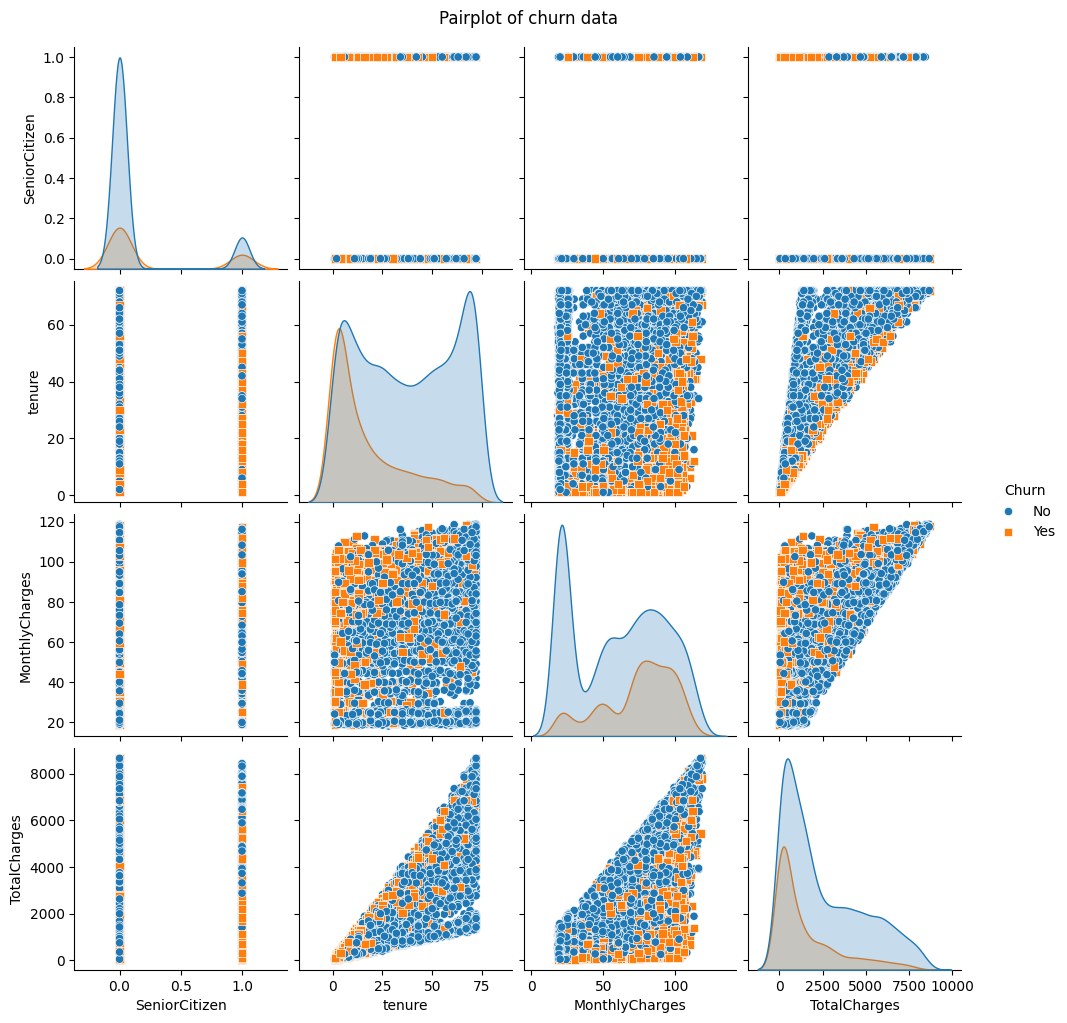

In [104]:
# Data Visualization
sns.pairplot(df, hue='Churn', markers=["o", "s"])
plt.suptitle("Pairplot of churn data", y=1.02)
plt.show()

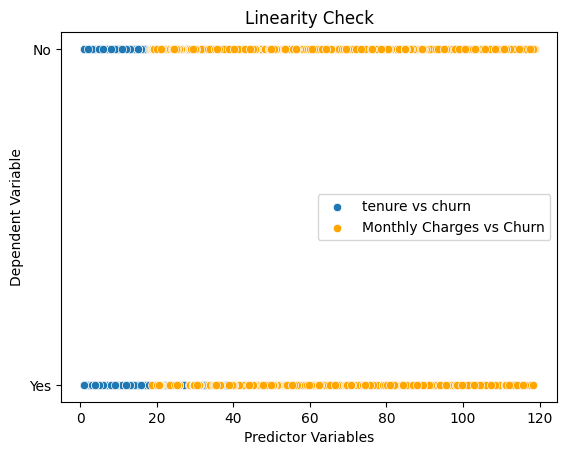

In [105]:
# Scatter Plots
sns.scatterplot(x=df['tenure'], y=df['Churn'], label='tenure vs churn')
sns.scatterplot(x=df['MonthlyCharges'], y=df['Churn'], label='Monthly Charges vs Churn', color='orange')
plt.title('Linearity Check')
plt.xlabel('Predictor Variables')
plt.ylabel('Dependent Variable')
plt.legend()
plt.show()

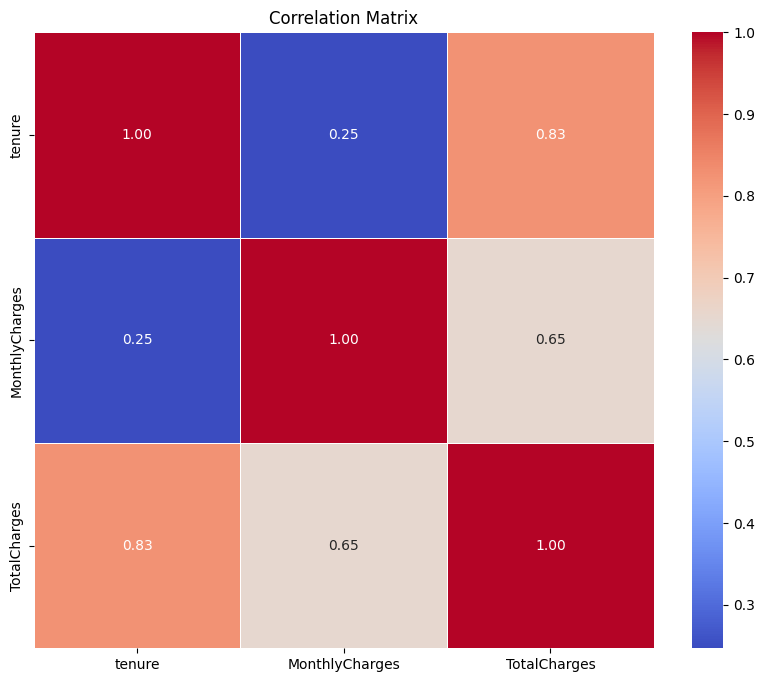

In [106]:
# Correlation matrix
df_selected = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
corr_matrix = df_selected.corr()

# Plot the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# 1. Building Model - Linear Regression Model

In [107]:
# Map "Yes" to 1 and "No" 0
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})
df=df.dropna()

# Splitting the data
X = df[['tenure', 'MonthlyCharges']]
y = df['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)




# Train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)





# Predictions on the test set
y_pred = linear_model.predict(X_test)





# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')


print('Coefficents:', linear_model.coef_)
print('Intercept:', linear_model.intercept_)

MSE: 0.1564167954209904
Coefficents: [-0.19110403  0.13293816]
Intercept: 0.2667750883364985


# Interpretation of Coefficents
- Tenure (-0.1911): As tenure increases, the likelihood of churn decreases. For every additional unit of tenure, the churn probability decreases by 0.191.
- MonthlyCharges (0.1329): As monthly charges increase, the likelihood of churn increases. For every additional unit of monthly charges, the churn probability increases by 0.133.

# Evaluation - Linear Regression
The MSE of 0.1564 indicates the average squared difference between predicted and actual churn values, which is not huge.

# 2. Building model - Logisgtic Regression

In [108]:
# Train the model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)





# Predictions on the test set
y_pred = logistic_model.predict(X_test)





# Evaluate the model
acc_score = accuracy_score(y_test, y_pred)
print(f'acc_score: {acc_score}')


print('Coefficents:', logistic_model.coef_)
print('Intercept:', logistic_model.intercept_)

acc_score: 0.7782515991471215
Coefficents: [[-1.36297334  0.9947906 ]]
Intercept: [-1.44332219]


# Interpretation of Coefficents
The coefficients [-1.36, 0.99] mean:

1. -1.36: For every unit increase in the tenure, the likelihood of churn decreases is -1.36.
2. 0.99: For every unit increase in the MonthlyCharges, the likelihood of churn increases is 0.99
.

# Evaluation - Logistic Regression
The accuracy score of 0.778 means that the logistic regression model correctly predicted whether a customer would churn or not about 77.8% of the time.

# 3. Building Model - GAM


In [109]:
# Train the model
gam_model = LogisticGAM(s(0) + s(1))
gam_model.fit(X_train, y_train)



# Predictions on the test set
y_pred = gam_model.predict(X_test)



# Evaluate the model
acc_score_gam = accuracy_score(y_test, y_pred)
print(f'acc_score_gam: {acc_score_gam}')


acc_score_gam: 0.7867803837953091


# Evaluation - GAM
Generalized Additive Model (GAM) predicted whether a customer would churn or not about 78.7%.



# Model Performance and Recommendations:
### - Generalized Additive Model (GAM)

- Accuracy: 78.68%
Strengths: Captures non-linear relationships and provides visual insights into feature effects.
- Weaknesses: More complex and can overfit if not tuned properly.
- Recommendation: Best for capturing complex customer behaviors and offering detailed insights.


### - Logistic Regression

- Accuracy: 77.83%
- Strengths: Simple, interpretable, and computationally efficient.
- Weaknesses: Limited to linear relationships.
- Recommendation: A solid baseline model for quick implementation.



### - Linear Regression

- MSE: 0.1564
- Weaknesses: Not suited for binary classification tasks like churn prediction.



### - Conclusion:
The company should use GAM for its accuracy and non-linear modeling, with logistic regression as a simpler alternative. Avoid using linear regression for churn prediction.